In [2]:
pip install meteostat pandas

In [3]:
from datetime import datetime
import meteostat as mt
import pandas as pd

In [4]:
start = datetime(1990, 1, 1)
end = datetime(2025, 8, 1)

In [5]:
location_id = '45007'

In [6]:
data = mt.Daily(location_id, start, end)
data = data.fetch()

In [7]:
df = pd.DataFrame(data)
df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1990-01-01,16.8,15.0,18.0,<NA>,<NA>,<NA>,14.0,<NA>,<NA>,<NA>
1990-01-02,16.8,15.0,18.0,<NA>,<NA>,<NA>,7.9,<NA>,<NA>,<NA>
1990-01-03,16.5,15.0,18.0,<NA>,<NA>,<NA>,17.4,<NA>,<NA>,<NA>
1990-01-04,16.6,16.0,18.0,<NA>,<NA>,<NA>,22.3,<NA>,<NA>,<NA>
1990-01-05,17.8,16.0,20.0,<NA>,<NA>,<NA>,20.1,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
2025-07-28,30.4,28.1,33.7,4.4,<NA>,<NA>,18.0,<NA>,998.0,<NA>
2025-07-29,29.3,28.0,30.7,63.1,<NA>,<NA>,14.7,<NA>,996.6,<NA>
2025-07-30,30.5,29.2,33.4,21.1,<NA>,<NA>,18.2,<NA>,997.1,<NA>


In [8]:
print(df.head())

            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun
time                                                                  
1990-01-01  16.8  15.0  18.0  <NA>  <NA>  <NA>  14.0  <NA>  <NA>  <NA>
1990-01-02  16.8  15.0  18.0  <NA>  <NA>  <NA>   7.9  <NA>  <NA>  <NA>
1990-01-03  16.5  15.0  18.0  <NA>  <NA>  <NA>  17.4  <NA>  <NA>  <NA>
1990-01-04  16.6  16.0  18.0  <NA>  <NA>  <NA>  22.3  <NA>  <NA>  <NA>
1990-01-05  17.8  16.0  20.0  <NA>  <NA>  <NA>  20.1  <NA>  <NA>  <NA>


In [9]:

df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2025-07-23', '2025-07-24', '2025-07-25', '2025-07-26',
               '2025-07-27', '2025-07-28', '2025-07-29', '2025-07-30',
               '2025-07-31', '2025-08-01'],
              dtype='datetime64[ns]', name='time', length=12858, freq=None)

In [10]:

df.index = pd.to_datetime(df.index)
df['year'] = df.index.year
df[['year', 'tavg']]
df_year_tavg = df[['year', 'tavg']]
df_year_tavg


,year,tavg
time,,
1990-01-01,1990,16.8
1990-01-02,1990,16.8
1990-01-03,1990,16.5
1990-01-04,1990,16.6
1990-01-05,1990,17.8
...,...,...
2025-07-28,2025,30.4
2025-07-29,2025,29.3
2025-07-30,2025,30.5


In [11]:
df_year_tavg = df.groupby(by=['year']).agg({"tavg":'mean'})
df_year_tavg

,tavg
year,
1990,23.740331
1991,24.104986
1992,23.504789
1993,23.680392
1994,24.332584
1995,23.111076
1996,23.875623
1997,24.072853
1998,24.551404


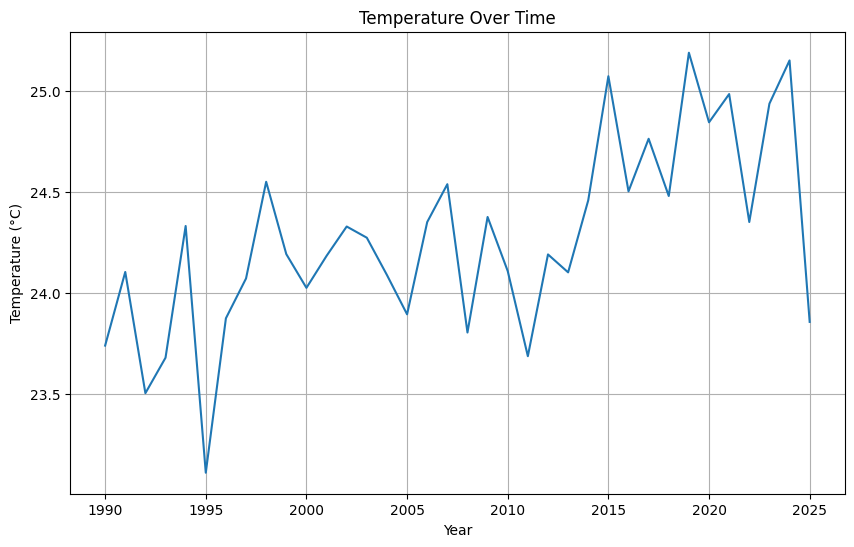

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_year_tavg, x='year', y='tavg')  # Adjust columns as needed
plt.title('Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12858 entries, 1990-01-01 to 2025-08-01
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    12852 non-null  Float64
 1   tmin    10980 non-null  Float64
 2   tmax    10980 non-null  Float64
 3   prcp    1139 non-null   Float64
 4   snow    0 non-null      Float64
 5   wdir    0 non-null      Float64
 6   wspd    12857 non-null  Float64
 7   wpgt    0 non-null      Float64
 8   pres    2596 non-null   Float64
 9   tsun    0 non-null      Float64
 10  year    12858 non-null  int32  
dtypes: Float64(10), int32(1)
memory usage: 1.3 MB


In [14]:
df.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,year
count,12852.0,10980.0,10980.0,1139.0,0.0,0.0,12857.0,0.0,2596.0,0.0,12858.000000
mean,24.280952,22.128306,27.026011,5.347322,<NA>,<NA>,15.719834,<NA>,1012.365177,<NA>,2007.404106
std,5.318722,5.392574,5.444037,11.852188,<NA>,<NA>,5.535577,<NA>,6.547785,<NA>,10.261246
min,4.8,3.0,7.0,0.0,<NA>,<NA>,3.5,<NA>,988.2,<NA>,1990.000000
25%,20.2,18.0,23.0,0.0,<NA>,<NA>,11.7,<NA>,1007.3,<NA>,1999.000000
50%,25.5,23.05,28.0,0.7,<NA>,<NA>,14.8,<NA>,1011.9,<NA>,2007.000000
75%,28.9,27.0,31.7,5.0,<NA>,<NA>,18.7,<NA>,1017.5,<NA>,2016.000000
max,33.5,31.6,37.0,126.7,<NA>,<NA>,63.4,<NA>,1030.6,<NA>,2025.000000


In [15]:
df.columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun', 'year'],
      dtype='object')

In [16]:
df['tavg'].value_counts().head(5)

,count
tavg,
30.0,173
29.8,172
29.2,162
30.6,149
29.6,143


In [17]:
df['tmin'].value_counts().head(5)

,count
tmin,
27.0,760
26.0,704
28.0,702
25.0,580
29.0,462


In [18]:
start = datetime(1990, 6, 1)
end = datetime(1990, 9, 30)

In [19]:
df_1990 = pd.DataFrame(data)
df_1990

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1990-01-01,16.8,15.0,18.0,<NA>,<NA>,<NA>,14.0,<NA>,<NA>,<NA>
1990-01-02,16.8,15.0,18.0,<NA>,<NA>,<NA>,7.9,<NA>,<NA>,<NA>
1990-01-03,16.5,15.0,18.0,<NA>,<NA>,<NA>,17.4,<NA>,<NA>,<NA>
1990-01-04,16.6,16.0,18.0,<NA>,<NA>,<NA>,22.3,<NA>,<NA>,<NA>
1990-01-05,17.8,16.0,20.0,<NA>,<NA>,<NA>,20.1,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
2025-07-28,30.4,28.1,33.7,4.4,<NA>,<NA>,18.0,<NA>,998.0,<NA>
2025-07-29,29.3,28.0,30.7,63.1,<NA>,<NA>,14.7,<NA>,996.6,<NA>
2025-07-30,30.5,29.2,33.4,21.1,<NA>,<NA>,18.2,<NA>,997.1,<NA>


In [20]:
df_1990.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,12852.0,10980.0,10980.0,1139.0,0.0,0.0,12857.0,0.0,2596.0,0.0
mean,24.280952,22.128306,27.026011,5.347322,<NA>,<NA>,15.719834,<NA>,1012.365177,<NA>
std,5.318722,5.392574,5.444037,11.852188,<NA>,<NA>,5.535577,<NA>,6.547785,<NA>
min,4.8,3.0,7.0,0.0,<NA>,<NA>,3.5,<NA>,988.2,<NA>
25%,20.2,18.0,23.0,0.0,<NA>,<NA>,11.7,<NA>,1007.3,<NA>
50%,25.5,23.05,28.0,0.7,<NA>,<NA>,14.8,<NA>,1011.9,<NA>
75%,28.9,27.0,31.7,5.0,<NA>,<NA>,18.7,<NA>,1017.5,<NA>
max,33.5,31.6,37.0,126.7,<NA>,<NA>,63.4,<NA>,1030.6,<NA>


In [21]:
start = datetime(2024, 1, 1)
end = datetime(2024, 12, 31)

In [22]:
df_2024 = pd.DataFrame(data)
df_2024


,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1990-01-01,16.8,15.0,18.0,<NA>,<NA>,<NA>,14.0,<NA>,<NA>,<NA>
1990-01-02,16.8,15.0,18.0,<NA>,<NA>,<NA>,7.9,<NA>,<NA>,<NA>
1990-01-03,16.5,15.0,18.0,<NA>,<NA>,<NA>,17.4,<NA>,<NA>,<NA>
1990-01-04,16.6,16.0,18.0,<NA>,<NA>,<NA>,22.3,<NA>,<NA>,<NA>
1990-01-05,17.8,16.0,20.0,<NA>,<NA>,<NA>,20.1,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
2025-07-28,30.4,28.1,33.7,4.4,<NA>,<NA>,18.0,<NA>,998.0,<NA>
2025-07-29,29.3,28.0,30.7,63.1,<NA>,<NA>,14.7,<NA>,996.6,<NA>
2025-07-30,30.5,29.2,33.4,21.1,<NA>,<NA>,18.2,<NA>,997.1,<NA>


In [23]:
df_2024.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,12852.0,10980.0,10980.0,1139.0,0.0,0.0,12857.0,0.0,2596.0,0.0
mean,24.280952,22.128306,27.026011,5.347322,<NA>,<NA>,15.719834,<NA>,1012.365177,<NA>
std,5.318722,5.392574,5.444037,11.852188,<NA>,<NA>,5.535577,<NA>,6.547785,<NA>
min,4.8,3.0,7.0,0.0,<NA>,<NA>,3.5,<NA>,988.2,<NA>
25%,20.2,18.0,23.0,0.0,<NA>,<NA>,11.7,<NA>,1007.3,<NA>
50%,25.5,23.05,28.0,0.7,<NA>,<NA>,14.8,<NA>,1011.9,<NA>
75%,28.9,27.0,31.7,5.0,<NA>,<NA>,18.7,<NA>,1017.5,<NA>
max,33.5,31.6,37.0,126.7,<NA>,<NA>,63.4,<NA>,1030.6,<NA>


In [24]:
df_1990_94 = df.loc['1990-01-01':'1994-12-31']
df_1990_94.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,year
count,1791.0,1147.0,1147.0,0.0,0.0,0.0,1792.0,0.0,0.0,0.0,1792.000000
mean,23.87292,21.802964,26.637315,<NA>,<NA>,<NA>,14.663672,<NA>,<NA>,<NA>,1991.991629
std,5.110931,5.106498,5.117735,<NA>,<NA>,<NA>,5.393524,<NA>,<NA>,<NA>,1.415964
min,6.0,5.0,9.0,<NA>,<NA>,<NA>,3.5,<NA>,<NA>,<NA>,1990.000000
25%,19.8,18.0,23.0,<NA>,<NA>,<NA>,10.675,<NA>,<NA>,<NA>,1991.000000
50%,24.7,23.0,27.0,<NA>,<NA>,<NA>,13.9,<NA>,<NA>,<NA>,1992.000000
75%,28.5,26.0,31.0,<NA>,<NA>,<NA>,17.6,<NA>,<NA>,<NA>,1993.000000
max,33.5,30.0,37.0,<NA>,<NA>,<NA>,38.3,<NA>,<NA>,<NA>,1994.000000


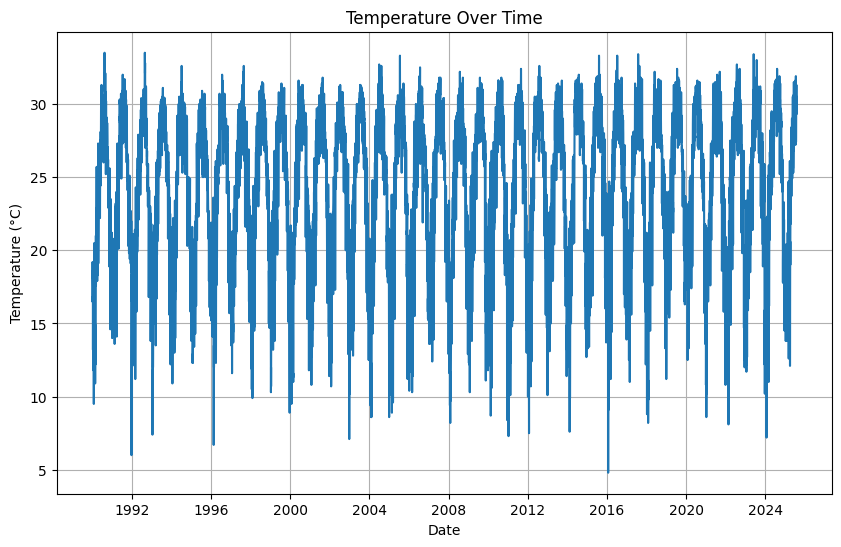

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='time', y='tavg')  # Adjust columns as needed
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

In [28]:
df[['tavg','tmin','tmax']]

,tavg,tmin,tmax
time,,,
1990-01-01,16.8,15.0,18.0
1990-01-02,16.8,15.0,18.0
1990-01-03,16.5,15.0,18.0
1990-01-04,16.6,16.0,18.0
1990-01-05,17.8,16.0,20.0
...,...,...,...
2025-07-28,30.4,28.1,33.7
2025-07-29,29.3,28.0,30.7
2025-07-30,30.5,29.2,33.4


In [30]:
# Filter for Spring (March, April, May)
spring_df = df[df.index.month.isin([3, 4, 5])]
spring_df= spring_df.groupby(by=['year']).agg({"tavg":'mean'})


In [31]:
# Filter for Spring (March, April, May)
summer_df = df[df.index.month.isin([6, 7, 8])]
summer_df= summer_df.groupby(by=['year']).agg({"tavg":'mean'})

In [32]:
# Filter for Spring (Sep, Oct, Nov)
autumn_df = df[df.index.month.isin([9,10, 11])]
autumn_df = autumn_df.groupby(by=['year']).agg({"tavg":'mean'})

In [33]:
# Filter for autumn (Dec, Jan, Feb)
winter_df = df[df.index.month.isin([12,1,2])]
winter_df = winter_df.groupby(by=['year']).agg({"tavg":'mean'})

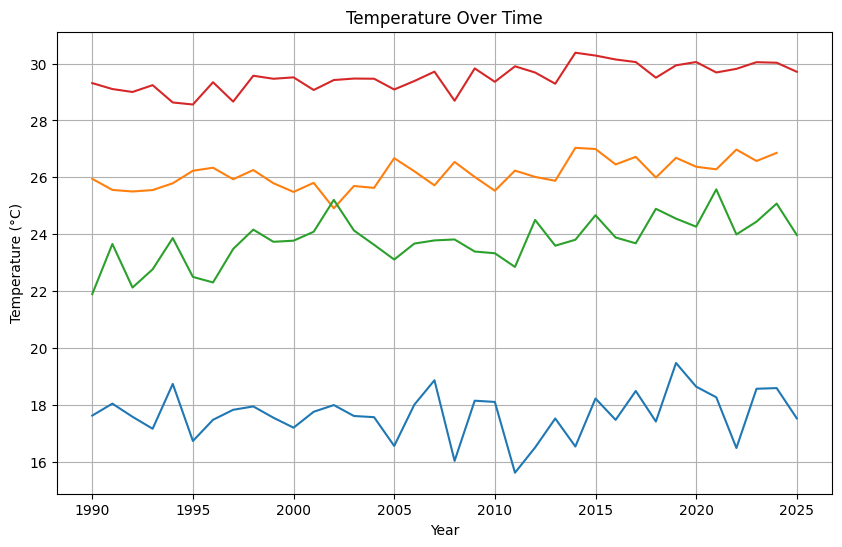

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=winter_df, x='year', y='tavg')  # Adjust columns as needed
sns.lineplot(data=autumn_df, x='year', y='tavg')
sns.lineplot(data=spring_df, x='year', y='tavg')
sns.lineplot(data=summer_df, x='year', y='tavg')
plt.title('Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()
